**What Notebook **
1. Complete description about Cnn
 
3. Introduction
4. Data Prepration
5. CNN
6. Evalute The Model
7. Predication and Submission
8. Tunning the Parameter
9. for sake of simplicity I am not showing output of an 

***Introdutcion**


This is a Sequential Convolutional Neural Network for digits recognition trained on MNIST dataset. I choosed to build it with keras API (Tensorflow backend) which is very intuitive. Firstly, I will get the data (handwritten digits images) from kaggle  then i will focus on the CNN modeling and evaluation.

I achieved 99.828% of accuracy with this CNN trained i collected the dataset from kaggle nearly (42000 images) and Keras mnist about (70000 images) and also more images you can generate using Image Data Generators by rotating images or changing the dimension of image 



***Before you developing you cnn model first you check you tensorflow-gpu is install on your system
 
 *Required module*
1.  numpy
2. pandas
3. opencv
4. keras
5. tensorflow-gpu 
6. tensorflow
 

*** Extra Knowledge  ***
1. How We Resolve Python Error 
* from behalf of my experience it was one of difficult task to reslove the error in python :  You can follow these point to solve error
1. Error last line describe the type of error .copy and paste  that line in google chrome first two link is either stackoverflow or can be  github about 95% chances these two were very helpfull to resolve the error

2. Second type of error can occur either due to module found error or something you have not install some package
           ****for this i recommended you to refer documentation of that module or you tube video****
                                                                               

**
When you start learning deep learning with neural network, you realize that one of the most powerful supervised deep learning techniques is the Convolutional Neural Networks (abbreviated as “CNN”). The final structure of a CNN is actually very similar to Regular Neural Networks (RegularNets) where there are neurons with weights and biases. In addition, just like in RegularNets, we use a loss function (e.g. crossentropy or softmax) and an optimizer (e.g. adam optimizer) in CNNs [2]. Additionally though, in CNNs, there are also Convolutional Layers, Pooling Layers, and Flatten Layers. CNNs are mainly used for image classification although you may find other application areas such as natural language processing.**



**Why Convolutional Neural Networks**


**The main structural feature of RegularNets is that all the neurons are connected to each other. For example, when we have images with 28 by 28 pixels with only greyscale, we will end up having 784 (28 x 28 x 1) neurons in a layer which seems manageable. However, most images have way more pixels and they are not grey-scaled. Therefore, assuming that we have a set of color images in 4K Ultra HD, we will have 26,542,080 (4096 x 2160 x 3) different neurons connected to each other in the first layer which is not really manageable. Therefore, we can say that RegularNets are not scalable for image classification. However, especially when it comes to images, there seems to be little correlation or relation between two individual pixels unless they are close to each other. This leads to the idea of Convolutional Layers and Pooling Layers.**

Layers in a CNN
> **We are capable of using many different layers in a convolutional neural network. 
However, convolution, pooling, and fully connect layers are the most important ones. 
Therefore, I will quickly introduce these layers before implementing them.**


> Convolutional Layers
Convolutional layer is the very first layer where we extract features from the images in our datasets. Due to the fact that pixels are only related with the adjacent and close pixels, convolution allows us to preserve the relationship between different parts of an image. Convolution is basically filtering the image with a smaller pixel filter to decrease the size of the image without loosing the relationship between pixels. When we apply convolution to 5x5 image by using a 3x3 filter with 1x1 stride (1 pixel shift at each step). We will end up having a 3x3 output (64% decrease in complexity).
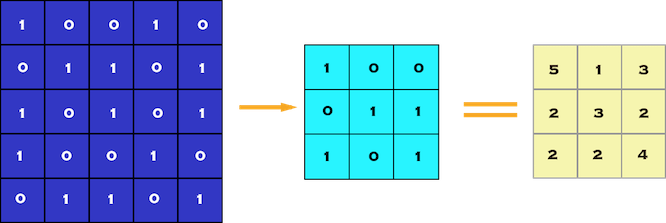

Pooling Layer
When constructing CNNs, it is common to insert pooling layers after each convolution layer to reduce the spatial size of the representation to reduce the parameter counts which reduces the computational complexity. In addition, pooling layers also helps with the overfitting problem. Basically we select a pooling size to reduce the amount of the parameters by selecting the maximum, average, or sum values inside these pixels. Max Pooling, one of the most common pooling techniques, may be demonstrated as follows:
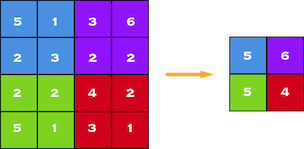

A Set of Fully Connected Layers
A fully connected network is our RegularNet where each parameter is linked to one another to determine the true relation and effect of each parameter on the labels. Since our time-space complexity is vastly reduced thanks to convolution and pooling layers, we can construct a fully connected network in the end to classify our images. A set of fully connected layers looks like this:
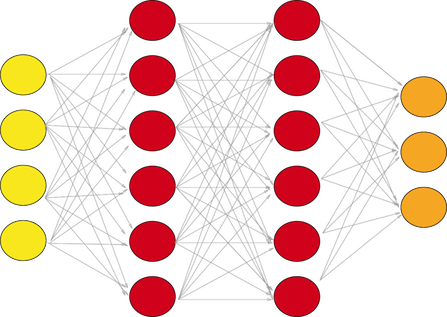

Now that you have some idea about the individual layers that we will use, I think it is time to share an overview look of a complete convolutional neural network.
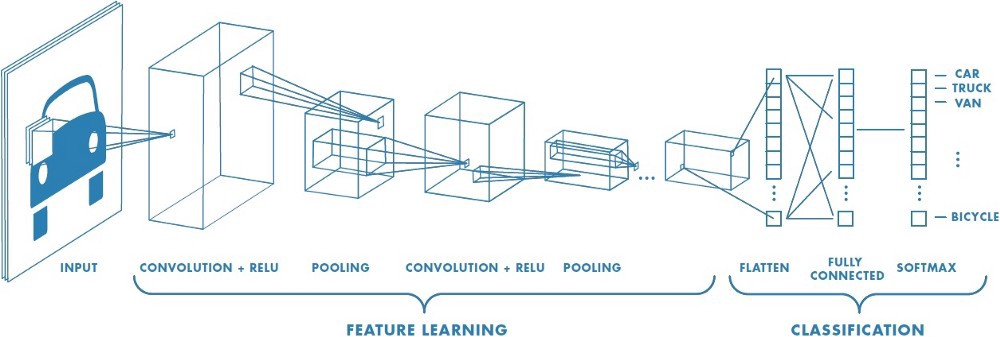
And now that you have an idea of convolutional neural network that you can build for image classification, we can get the most cliche dataset for classification: MNIST dataset, which stands for Modified National Institute of Standards and Technology database. It is a large database of handwritten digits that is commonly used for training various image processing systems.


Downloading the Mnist Data
The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API. Therefore, I will start with the following two lines to import tensorflow and MNIST dataset under the Keras API.

****First Import Required Library****

In [ ]:
import pandas as pd
# for data exploration
import numpy as np
#for numerical caluation handling multidimensional array
import matplotlib.pyplot as plt
import seaborn as  sns
# for data visualisation
import keras
import tensorflow
# for CNN model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist

In [ ]:
df_train=pd.read_csv('../input/digit-recognizer/train.csv')
df_test=pd.read_csv('../input/digit-recognizer/test.csv')

**Visualization of data**

Reshaping and Normalizing the Images



To be able to use the dataset in Keras API, we need 4-dims numpy arrays. However, as we see above, our array is 3-dims. In addition, we must normalize our data as it is always required in neural network models. We can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code). This can be done with the following code:


# Check for Missing Value

In [ ]:
print(type(df_test))
print(type(df_train))
df_test.isnull().sum()
df_train.isnull().sum()

# from the above we cannot predict what actually it show

# for simplicity
df_test.isnull().sum().sum()
df_train.isnull().sum().sum()

In [ ]:
df_train.head()

In [ ]:


print(df_train.shape)
print(df_test.shape)

# target corresponding to 28x28 pixel
target=df_train.iloc[:,1:]
label=df_train.iloc[:,0]


#Here we have to convert dataframe to numpy array for numerical computation  
target=np.array(target)
df_test=np.array(df_test)


print(target.shape)
print(df_test.shape)


# reshaping the dataset
target=target.reshape(42000,28,28)
df_test=df_test.reshape(28000,28,28)

#max value of each pixel can be 255 ,it difficult for cpu to process such large value
# Reduce each pixel from 0 to 1
target=target/target.max()
df_test=df_test/df_test.max()


print(target.shape)
print(df_test.shape)


In [ ]:
import matplotlib.pyplot as plt
img=df_test[2]
plt.imshow(img,cmap='gray')
print(type(img))

# No change in imgae after normlization

In [ ]:
# why we convert it into numerical
# for categorical_crossentropy we have to convert into categorical data 
# for sparse_categorical_crossentropy we make remain unchage
# But I strongly recommend you to use categorical_crossentropy



target=target.reshape(42000,28,28,1)
df_test=df_test.reshape(28000,28,28,1)

label=np.array(label)
label_cat=to_categorical(label,10)


print(label.shape)
print(label_cat.shape)
print(target.shape)
print(df_test.shape)

Building the Convolutional Neural Network



We will build our model by using high level Keras API which uses either TensorFlow or Theano on the backend. I would like to mention that there are several high level TensorFlow APIs such as Layers, Keras, and Estimators which helps us create neural networks with high level knowledge. However, this may lead to confusion since they all varies in their implementation structure. Therefore, if you see completely different codes for the same neural network although they all use tensorflow, this is why. I will use the most straightforward API which is Keras. Therefore, I will import the Sequential Model from Keras and add Conv2D, MaxPooling, Flatten, Dropout, and Dense layers. I have already talked about Conv2D, Maxpooling, and Dense layers. In addition, Dropout layers fight with the overfitting by disregarding some of the neurons while training while Flatten layers flatten 2D arrays to 1D array before building the fully connected layers.


In [ ]:
from keras.layers.normalization import BatchNormalization

classifier = Sequential()

classifier.add(Convolution2D(filters = 128, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(BatchNormalization())
classifier.add(Convolution2D(filters = 128, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))

In [ ]:
classifier.add(Convolution2D(filters =256, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(filters = 256, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
classifier.add(Dropout(0.25))

In [ ]:
classifier.add(Flatten())
classifier.add(Dense(256, activation = "relu"))
classifier.add(Dropout(0.3))
classifier.add(Dense(10, activation = "softmax"))

Compiling and Fitting the Model




With the above code, we created an non-optimized empty CNN. Now it is time to set an optimizer with a given loss function which uses a metric. Then, we can fit the model by using our train data. We will use the following code for these tasks:

In [ ]:
classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

**Now Its Time To collect little much more data**

First By Normal fit method method

In [ ]:
classifier.fit(target,label_cat,epochs=50)

In [ ]:
results=classifier.predict_classes(df_test)
print(results)

results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
#submission.to_csv("F:\\PYTHON PROGRAM\\JaiShreeRammnist11.csv",index=False)
submission.to_csv("submission.csv",index=False,header=True)

In [ ]:
submission.head()

Now collected more Image by change its dimension

# Lets Try Another Way

**I Know This is Wrong Method of collecting data from keras model but this is also an research on data**
**If you  want to escape this part you can do**

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()


print(X_train.shape)
print(X_test.shape)
print(type(X_train))



import matplotlib.pyplot as plt
img=X_train[0]
plt.imshow(img,cmap='gray')
print(type(img))

In [ ]:
print(y_train)
X_train=X_train/X_train.max()
X_test=X_test/X_test.max()
import matplotlib.pyplot as plt
img=X_train[0]
plt.imshow(img,cmap='gray')
print(type(img))

In [ ]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

fitting train and test data 

In [ ]:
classifier.fit(X_train,y_cat_train,epochs=25)

In [ ]:
results=classifier.predict_classes(df_test)
print(results)

results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
#submission.to_csv("F:\\PYTHON PROGRAM\\JaiShreeRammnist11.csv",index=False)
submission.to_csv("submission1.csv",index=False,header=True)

In [ ]:
classifier.fit(X_test,y_cat_test,epochs=25)

In [ ]:
results=classifier.predict_classes(df_test)
print(results)

results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
#submission.to_csv("F:\\PYTHON PROGRAM\\JaiShreeRammnist11.csv",index=False)
submission.to_csv("submission2.csv",index=False,header=True)